In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


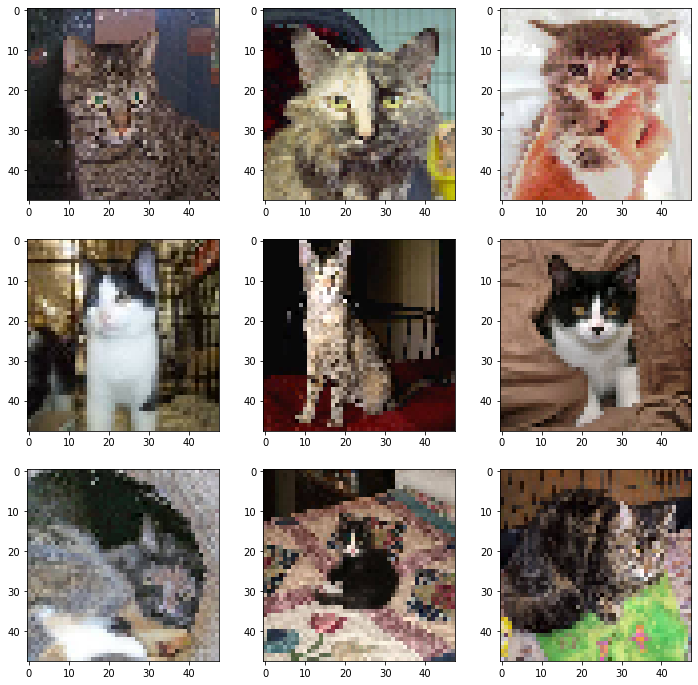

In [3]:
picture_size = 48
folder_path = r"D:/pds_project/dogscats/dogscats/train/"
expression = 'cats'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+expression+"/"+
                  os.listdir(folder_path + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [4]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [5]:
training_set = train_datagen.flow_from_directory(r'D:\pds_project\dogscats\dogscats\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'D:\pds_project\dogscats\dogscats\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 12981 images belonging to 2 classes.
Found 4589 images belonging to 2 classes.


In [6]:
#Model Building
model=Sequential()

#1st layers
model.add(Conv2D(filters=32,
                 padding="same",
                 kernel_size=3,
                 activation='relu',
                 input_shape=[64,64,3]
                 ))
model.add(MaxPooling2D(pool_size=2,strides=2))

#2nd layers
model.add(Conv2D(filters=32,
                 padding='same',
                 kernel_size=3,
                 activation='relu'
                 ))
model.add(MaxPooling2D(pool_size=2,strides=2))

#falatten layers
model.add(Flatten())

#Dense layers
model.add(Dense(units=128,activation='relu'))

#output layers
model.add(Dense(units=1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [8]:
#Training our  model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit(x=training_set,validation_data=test_set,epochs=10)

Epoch 1/10
406/406 [==============================] - 422s 1s/step - loss: 0.6548 - accuracy: 0.6154 - val_loss: 0.5958 - val_accuracy: 0.6788
Epoch 2/10
406/406 [==============================] - 106s 261ms/step - loss: 0.5805 - accuracy: 0.6949 - val_loss: 0.5656 - val_accuracy: 0.7126
Epoch 3/10
406/406 [==============================] - 106s 260ms/step - loss: 0.5354 - accuracy: 0.7311 - val_loss: 0.5146 - val_accuracy: 0.7448
Epoch 4/10
406/406 [==============================] - 106s 260ms/step - loss: 0.4967 - accuracy: 0.7593 - val_loss: 0.4817 - val_accuracy: 0.7712
Epoch 5/10
406/406 [==============================] - 106s 261ms/step - loss: 0.4847 - accuracy: 0.7659 - val_loss: 0.4707 - val_accuracy: 0.7777
Epoch 6/10
406/406 [==============================] - 105s 259ms/step - loss: 0.4602 - accuracy: 0.7842 - val_loss: 0.4696 - val_accuracy: 0.7734
Epoch 7/10
406/406 [==============================] - 106s 260ms/step - loss: 0.4495 - accuracy: 0.7947 - val_loss: 0.4642 - va

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


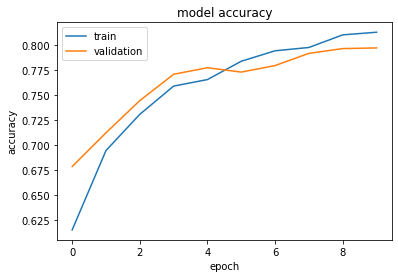

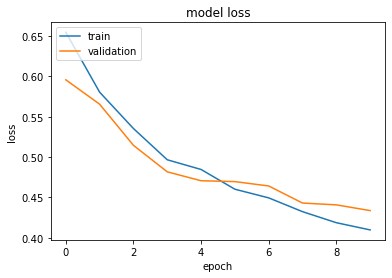

In [9]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
model.save("cat_vs_dog_model.h5")

In [12]:
from tensorflow.keras.models import load_model
model=load_model("cat_vs_dog_model.h5")
from tensorflow.keras.preprocessing import image
test_image=image.load_img(r"D:\pds_project\dogscats\dogscats\sample\train\dogs\dog.1402.jpg",target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)

[[0.74329627]]


In [13]:
if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
